<a href="https://colab.research.google.com/github/SHOBHEY/AVINASH/blob/main/Simulation_of_Markov_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Markov chain simulation and Empirical Distribution

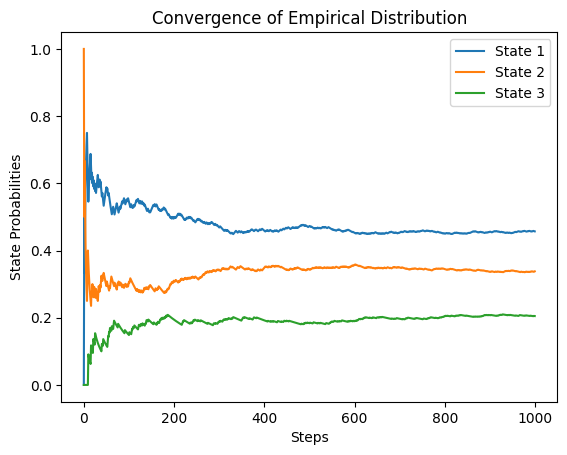

Final Empirical Distribution: [0.457 0.338 0.205]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define transition matrix (TPM) and initial distribution
P = np.array([
    [0.5, 0.3, 0.2],
    [0.4, 0.4, 0.2],
    [0.3, 0.4, 0.3]
])

# Initial distribution (u) for state 1, 2, 3
u_initial = np.array([0.4, 0.4, 0.2])

# Simulate the Markov chain for N steps
N = 1000
states = np.zeros(N, dtype=int)  # Array to store states
states[0] = np.random.choice([0, 1, 2], p=u_initial)  # Start with initial distribution

# Simulate state transitions
for i in range(1, N):
    current_state = states[i - 1]
    next_state = np.random.choice([0, 1, 2], p=P[current_state])
    states[i] = next_state

# Calculate the empirical distribution after N steps
empirical_dist = np.bincount(states, minlength=3) / N

# Plot the convergence of the empirical distribution
plt.plot(np.arange(N), [np.bincount(states[:i+1], minlength=3) / (i+1) for i in range(N)], label='Empirical Distribution')
plt.xlabel('Steps')
plt.ylabel('State Probabilities')
plt.title('Convergence of Empirical Distribution')
plt.legend(['State 1', 'State 2', 'State 3'])
plt.show()

# Final empirical distribution after all steps
print("Final Empirical Distribution:", empirical_dist)


In [ ]:
import numpy as np

# Transition matrix (P)
P = np.array([
    [0.5, 0.3, 0.2],
    [0.4, 0.4, 0.2],
    [0.3, 0.4, 0.3]
])

# We need to solve πP = π, or equivalently (πP - π = 0)
# Add the normalization condition π1 + π2 + π3 = 1
A = P.T - np.eye(3)
b = np.zeros(3)
b[0] = 1  # Add normalization condition: sum of probabilities = 1

# Solve the system Aπ = b
limiting_distribution = np.linalg.lstsq(A, b, rcond=None)[0]
limiting_distribution = limiting_distribution / np.sum(limiting_distribution)  # Normalize to ensure it sums to 1

print("Limiting Distribution:", limiting_distribution)


Limiting Distribution: [-2.38659794  1.83505155  1.55154639]


In [ ]:
import numpy as np

# Define the transition matrix (P)
P = np.array([
    [0.5, 0.3, 0.2],
    [0.4, 0.4, 0.2],
    [0.3, 0.4, 0.3]
])

# Define the stationary distribution pi (from earlier)
pi = np.array([0.3333, 0.3333, 0.3333])

# Multiply the transition matrix by the stationary distribution
pi_new = np.dot(P, pi)

# Check if the new vector pi_new is close to the original pi
print("Original pi:", pi)
print("Computed P * pi:", pi_new)

# Check if the difference is very small (to account for floating point precision)
difference = np.allclose(pi, pi_new, atol=1e-4)
print("Is pi = P * pi? ", difference)


Original pi: [0.3333 0.3333 0.3333]
Computed P * pi: [0.3333 0.3333 0.3333]
Is pi = P * pi?  True


In [ ]:
import numpy as np
import pandas as pd

def calculate_empirical_distribution(observed_states):
    """
    Calculate the empirical distribution of states from the observed data.

    Parameters:
        observed_states (list): A sequence of observed states.

    Returns:
        pd.Series: Empirical distribution of states.
    """
    # Step 1: Count the occurrences of each state
    state_counts = pd.Series(observed_states).value_counts()

    # Step 2: Normalize the counts to get probabilities
    total_states = len(observed_states)
    empirical_distribution = state_counts / total_states

    return empirical_distribution

# Example: Sequence of observed states
observed_states = [
    "Sunny", "Cloudy", "Rainy", "Sunny", "Sunny",
    "Cloudy", "Rainy", "Rainy", "Sunny", "Cloudy",
    "Rainy", "Sunny", "Cloudy", "Cloudy", "Sunny",
    "Rainy", "Sunny", "Rainy", "Cloudy", "Rainy"
]

# Calculate empirical distribution
empirical_dist = calculate_empirical_distribution(observed_states)
print("Empirical Distribution of States:")
print(empirical_dist)


Empirical Distribution of States:
Sunny     0.35
Rainy     0.35
Cloudy    0.30
Name: count, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict

def infer_empirical_tpm(observed_states):
    """
    Infers the Empirical Transition Probability Matrix (TPM) from observed states.

    Parameters:
        observed_states (list): Sequence of observed states.

    Returns:
        pd.DataFrame: Empirical TPM.
    """
    # Step 1: Identify unique states
    unique_states = sorted(list(set(observed_states)))

    # Step 2: Count transitions
    transition_counts = defaultdict(lambda: defaultdict(int))
    for (current_state, next_state) in zip(observed_states[:-1], observed_states[1:]):
        transition_counts[current_state][next_state] += 1

    # Convert counts to DataFrame
    transition_df = pd.DataFrame(transition_counts).fillna(0).astype(int)

    # Step 3: Calculate TPM
    TPM = pd.DataFrame(columns=unique_states, index=unique_states).fillna(0.0)
    for state in unique_states:
        total_transitions = sum(transition_counts[state].values())
        if total_transitions > 0:
            for next_state in unique_states:
                TPM.loc[state, next_state] = transition_counts[state][next_state] / total_transitions
        else:
            # If no outgoing transitions, assign equal probabilities
            TPM.loc[state] = 1.0 / len(unique_states)

    return TPM

# Example Observed States
observed_states = [
    "Sunny", "Sunny", "Cloudy", "Rainy", "Sunny",
    "Cloudy", "Cloudy", "Rainy", "Rainy", "Sunny",
    "Rainy", "Cloudy", "Sunny", "Sunny", "Rainy",
    "Cloudy", "Sunny", "Rainy", "Cloudy", "Rainy"
]

# Infer Empirical TPM
empirical_TPM = infer_empirical_tpm(observed_states)
print("Empirical Transition Probability Matrix (TPM):")
print(empirical_TPM)


Empirical Transition Probability Matrix (TPM):
          Cloudy     Rainy     Sunny
Cloudy  0.166667  0.500000  0.333333
Rainy   0.500000  0.166667  0.333333
Sunny   0.285714  0.428571  0.285714


<ipython-input-11-50666edf4687>:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  TPM = pd.DataFrame(columns=unique_states, index=unique_states).fillna(0.0)


In [ ]:
import numpy as np

def simulate_weather(u, P, N):
    """
    Simulates weather over N days using a Markov chain.

    Parameters:
        u (list): Initial distribution (probabilities of Sunny, Cloudy, Rainy).
        P (2D list or np.array): Transition Probability Matrix (TPM).
        N (int): Number of days to simulate.

    Returns:
        list: Simulated sequence of weather states.
    """
    # Define weather states
    weather_states = ["Sunny", "Cloudy", "Rainy"]

    # Simulate initial state
    initial_state = np.random.choice(weather_states, p=u)
    simulated_weather = [initial_state]

    # Simulate Markov chain transitions
    current_state = weather_states.index(initial_state)
    for _ in range(N - 1):
        current_state = np.random.choice(range(len(weather_states)), p=P[current_state])
        simulated_weather.append(weather_states[current_state])

    return simulated_weather

# Inputs
u = [0.5, 0.3, 0.2]  # Initial distribution
P = [[0.8, 0.15, 0.05],  # Transition Probability Matrix
     [0.2, 0.6, 0.2],
     [0.3, 0.4, 0.3]]
N = 20  # Number of days

# Simulate Weather
simulated_weather = simulate_weather(u, P, N)
print("Simulated Weather Over 15 Days:", simulated_weather)


Simulated Weather Over 15 Days: ['Rainy', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Cloudy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy', 'Rainy', 'Cloudy', 'Cloudy', 'Sunny']


In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict

def infer_empirical_tpm(simulated_weather = simulate_weather(u, P, N)):
    """
    Infers the Empirical Transition Probability Matrix (TPM) from observed states.

    Parameters:
        observed_states (list): Sequence of observed states.

    Returns:
        pd.DataFrame: Empirical TPM.
    """
    # Step 1: Identify unique states
    unique_states = sorted(list(set(simulated_weather)))

    # Step 2: Count transitions
    transition_counts = defaultdict(lambda: defaultdict(int))
    for (current_state, next_state) in zip(simulated_weather [:-1], simulated_weather [1:]):
        transition_counts[current_state][next_state] += 1

    # Convert counts to DataFrame
    transition_df = pd.DataFrame(transition_counts).fillna(0).astype(int)

    # Step 3: Calculate TPM
    TPM = pd.DataFrame(columns=unique_states, index=unique_states).fillna(0.0)
    for state in unique_states:
        total_transitions = sum(transition_counts[state].values())
        if total_transitions > 0:
            for next_state in unique_states:
                TPM.loc[state, next_state] = transition_counts[state][next_state] / total_transitions
        else:
            # If no outgoing transitions, assign equal probabilities
            TPM.loc[state] = 1.0 / len(unique_states)

    return TPM

# Example Observed States
simulated_weather = ['Rainy', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Cloudy', 'Cloudy', 'Sunny', 'Sunny', 'Rainy', 'Cloudy', 'Cloudy', 'Cloudy', 'Cloudy', 'Rainy', 'Cloudy', 'Cloudy', 'Sunny']

# Infer Empirical TPM
empirical_TPM = infer_empirical_tpm(observed_states)
print("Empirical Transition Probability Matrix (TPM):")
print(empirical_TPM)

Empirical Transition Probability Matrix (TPM):
          Cloudy     Rainy     Sunny
Cloudy  0.166667  0.500000  0.333333
Rainy   0.500000  0.166667  0.333333
Sunny   0.285714  0.428571  0.285714


<ipython-input-37-ba0104633c66>:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  TPM = pd.DataFrame(columns=unique_states, index=unique_states).fillna(0.0)


In [ ]:
import numpy as np

def simulate_markov_chain_with_u0(u, P, N):
    """
    Simulates a Markov chain, explicitly setting the initial state using U0.

    Parameters:
        u (list): Initial distribution (probabilities of starting in each state).
        P (2D list or np.array): Transition Probability Matrix (TPM).
        N (int): Length of the Markov chain (number of steps).
        U0 (float): Random value in [0, 1] to determine initial state.

    Returns:
        list: Simulated sequence of states.
    """
    # Define states (e.g., 1 = Bull, 2 = Bear, 3 = Stagnant)
    states = np.arange(1, len(u) + 1)

    # Determine initial state using U0 and cumulative probabilities
    cumulative_u = np.cumsum(u)
    initial_state = np.random.choice(states, p=u)

    # Initialize the Markov chain
    simulated_states = [initial_state]
    current_state = initial_state

    # Simulate Markov chain transitions
    for _ in range(N - 1):
        current_state = np.random.choice(states, p=P[current_state - 1])
        simulated_states.append(current_state)

    return simulated_states

# Inputs
u = [0.5, 0.1, 0.4]  # Initial distribution
P = [[0.6, 0.3, 0.1],  # TPM
     [0.2, 0.7, 0.1],
     [0.3, 0.3, 0.4]]
N = 300  # Number of steps

# Run Simulation
simulated_chain = simulate_markov_chain_with_u0(u, P, N)
# print("Simulated Markov Chain States:", simulated_chain)


In [ ]:
import numpy as np
import pandas as pd
from collections import defaultdict

def infer_empirical_tpm(simulated_chain = simulate_markov_chain_with_u0(u, P, N)):
    """
    Infers the Empirical Transition Probability Matrix (TPM) from observed states.

    Parameters:
        observed_states (list): Sequence of observed states.

    Returns:
        pd.DataFrame: Empirical TPM.
    """
    # Step 1: Identify unique states
    unique_states = sorted(list(set(simulated_chain)))

    # Step 2: Count transitions
    transition_counts = defaultdict(lambda: defaultdict(int))
    for (current_state, next_state) in zip(simulated_chain [:-1], simulated_chain [1:]):
        transition_counts[current_state][next_state] += 1

    # Convert counts to DataFrame
    transition_df = pd.DataFrame(transition_counts).fillna(0).astype(int)

    # Step 3: Calculate TPM
    TPM = pd.DataFrame(columns=unique_states, index=unique_states).fillna(0.0)
    for state in unique_states:
        total_transitions = sum(transition_counts[state].values())
        if total_transitions > 0:
            for next_state in unique_states:
                TPM.loc[state, next_state] = transition_counts[state][next_state] / total_transitions
        else:
            # If no outgoing transitions, assign equal probabilities
            TPM.loc[state] = 1.0 / len(unique_states)

    return TPM

# Example Observed States
#simulated_chain :[1, 1, 1, 3, 3, 3, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 3, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 2, 1, 3, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 1, 1, 3, 3, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
# Infer Empirical TPM
empirical_TPM = infer_empirical_tpm(simulated_chain)
print("Empirical Transition Probability Matrix (TPM):")
print(empirical_TPM)

Empirical Transition Probability Matrix (TPM):
          1         2         3
1  0.565217  0.347826  0.086957
2  0.169697  0.739394  0.090909
3  0.285714  0.261905  0.452381


<ipython-input-49-eb97dee0ff55>:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  TPM = pd.DataFrame(columns=unique_states, index=unique_states).fillna(0.0)
